In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as mlt
import seaborn as sns
%matplotlib inline

In [ ]:
from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


In [ ]:
!pwd

/content


In [ ]:
m=pd.read_csv("/content/gdrive/My Drive/Colab Notebooks/matches.csv")

In [ ]:
d=pd.read_csv("/content/gdrive/My Drive/Colab Notebooks/deliveries.csv")

In [ ]:
m.head()

,id,Season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,IPL-2017,Hyderabad,05-04-2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,IPL-2017,Pune,06-04-2017,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,IPL-2017,Rajkot,07-04-2017,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,IPL-2017,Indore,08-04-2017,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,IPL-2017,Bangalore,08-04-2017,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [ ]:
d.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN


In [ ]:
d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 179078 entries, 0 to 179077
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   match_id          179078 non-null  int64 
 1   inning            179078 non-null  int64 
 2   batting_team      179078 non-null  object
 3   bowling_team      179078 non-null  object
 4   over              179078 non-null  int64 
 5   ball              179078 non-null  int64 
 6   batsman           179078 non-null  object
 7   non_striker       179078 non-null  object
 8   bowler            179078 non-null  object
 9   is_super_over     179078 non-null  int64 
 10  wide_runs         179078 non-null  int64 
 11  bye_runs          179078 non-null  int64 
 12  legbye_runs       179078 non-null  int64 
 13  noball_runs       179078 non-null  int64 
 14  penalty_runs      179078 non-null  int64 
 15  batsman_runs      179078 non-null  int64 
 16  extra_runs        179078 non-null  int

In [ ]:
d.describe()

,match_id,inning,over,ball,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs
count,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000
mean,1802.252957,1.482952,10.162488,3.615587,0.000452,0.036721,0.004936,0.021136,0.004183,0.000056,1.246864,0.067032,1.313897
std,3472.322805,0.502074,5.677684,1.806966,0.021263,0.251161,0.116480,0.194908,0.070492,0.016709,1.608270,0.342553,1.605422
min,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,190.000000,1.000000,5.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,379.000000,1.000000,10.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
75%,567.000000,2.000000,15.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
max,11415.000000,5.000000,20.000000,9.000000,1.000000,5.000000,4.000000,5.000000,5.000000,5.000000,7.000000,7.000000,10.000000


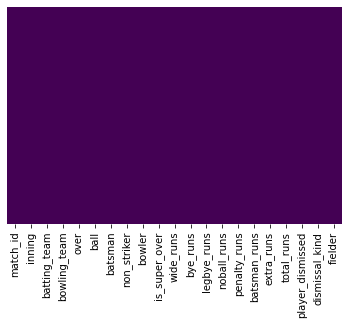

In [ ]:
d.dropna(inplace=True)
sns.heatmap(d.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [ ]:
d.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6448 entries, 11 to 179075
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   match_id          6448 non-null   int64 
 1   inning            6448 non-null   int64 
 2   batting_team      6448 non-null   object
 3   bowling_team      6448 non-null   object
 4   over              6448 non-null   int64 
 5   ball              6448 non-null   int64 
 6   batsman           6448 non-null   object
 7   non_striker       6448 non-null   object
 8   bowler            6448 non-null   object
 9   is_super_over     6448 non-null   int64 
 10  wide_runs         6448 non-null   int64 
 11  bye_runs          6448 non-null   int64 
 12  legbye_runs       6448 non-null   int64 
 13  noball_runs       6448 non-null   int64 
 14  penalty_runs      6448 non-null   int64 
 15  batsman_runs      6448 non-null   int64 
 16  extra_runs        6448 non-null   int64 
 17  total_runs 

In [ ]:
d.drop(['fielder','dismissal_kind'],axis=1,inplace=True)

In [ ]:
d.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6448 entries, 11 to 179075
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   match_id          6448 non-null   int64 
 1   inning            6448 non-null   int64 
 2   batting_team      6448 non-null   object
 3   bowling_team      6448 non-null   object
 4   over              6448 non-null   int64 
 5   ball              6448 non-null   int64 
 6   batsman           6448 non-null   object
 7   non_striker       6448 non-null   object
 8   bowler            6448 non-null   object
 9   is_super_over     6448 non-null   int64 
 10  wide_runs         6448 non-null   int64 
 11  bye_runs          6448 non-null   int64 
 12  legbye_runs       6448 non-null   int64 
 13  noball_runs       6448 non-null   int64 
 14  penalty_runs      6448 non-null   int64 
 15  batsman_runs      6448 non-null   int64 
 16  extra_runs        6448 non-null   int64 
 17  total_runs 

In [ ]:
from sklearn.preprocessing import LabelEncoder

le_columns = ['batsman', 'bowler','non_striker','player_dismissed','batting_team','bowling_team']
le = LabelEncoder()

for col in le_columns:
    d[col] = le.fit_transform(d[col])

In [ ]:
d

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed
11,1,1,14,13,2,5,95,319,2,0,0,0,0,0,0,0,0,0,96
64,1,1,14,13,11,3,338,218,300,0,0,0,0,0,0,0,0,0,341
94,1,1,14,13,16,2,228,420,342,0,0,0,0,0,0,0,0,0,230
165,1,2,13,14,7,3,78,393,83,0,0,0,0,0,0,0,0,0,78
199,1,2,13,14,12,4,188,393,187,0,0,0,0,0,0,1,0,1,190
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
178977,11415,2,0,8,4,6,120,363,154,0,0,0,0,0,0,0,0,0,120
179019,11415,2,0,8,11,3,47,363,136,0,0,0,0,0,0,0,0,0,47
179033,11415,2,0,8,13,5,382,238,109,0,0,0,0,0,0,1,0,1,251
179067,11415,2,0,8,19,2,100,363,136,0,0,0,0,0,0,0,0,0,101


In [ ]:
nominal_cols = ['batting_team', 'bowling_team'] 
d = pd.concat((d, pd.get_dummies(d[nominal_cols])), axis = 1)

In [ ]:
d.head(5)

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,batting_team,bowling_team
11,1,1,14,13,2,5,95,319,2,0,...,0,0,0,0,0,0,0,96,14,13
64,1,1,14,13,11,3,338,218,300,0,...,0,0,0,0,0,0,0,341,14,13
94,1,1,14,13,16,2,228,420,342,0,...,0,0,0,0,0,0,0,230,14,13
165,1,2,13,14,7,3,78,393,83,0,...,0,0,0,0,0,0,0,78,13,14
199,1,2,13,14,12,4,188,393,187,0,...,0,0,0,0,1,0,1,190,13,14


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(d.drop('total_runs',axis=1), 
                                                    d['total_runs'], test_size=0.30, 
                                                    random_state=101)

In [ ]:
from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression()

In [ ]:
predictions = logmodel.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report

In [ ]:
print(classification_report(y_test,predictions));

              precision    recall  f1-score   support

           0       0.95      1.00      0.98      1846
           1       0.00      0.00      0.00        85
           2       0.00      0.00      0.00         4

    accuracy                           0.95      1935
   macro avg       0.32      0.33      0.33      1935
weighted avg       0.91      0.95      0.93      1935



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 0.04806201550387597
MSE: 0.05219638242894057
RMSE: 0.22846527619955853
